In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
base_dir = os.path.join(os.getcwd(), 'drive/My Drive/Project_20/Dataset')
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(os.getcwd(), 'Test1')

In [ ]:
classes = 43
data = []
labels = []
for i in range(classes):
  path = os.path.join(train_dir, str(i))
  images = os.listdir(path)
  print(i)
  for j in images:
    print(path+ "/" + j)
    img = Image.open(path+ "/" + j)
    print(i)
    img = img.resize((30, 30))
    
    img = np.array(img)
    print(img.shape)
    data.append(img)
    labels.append(i)

Streaming output truncated to the last 5000 lines.
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/Train/12/00012_00035_00028.png
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/Train/12/00012_00035_00029.png
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/Train/12/00012_00036_00003.png
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/Train/12/00012_00036_00004.png
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/Train/12/00012_00036_00005.png
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/Train/12/00012_00036_00006.png
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/Train/12/00012_00036_00008.png
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/Train/12/00012_00036_00009.png
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/Train/12/00012_00036_00015.png
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/Train/12/00012_00036_00007.png
12
(30, 30, 3)
/content/drive/My Drive/Project_20/Dataset/T

In [ ]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39269, 30, 30, 3) (39269,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
Classifier = Sequential()
Classifier.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
Classifier.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
Classifier.add(MaxPool2D(pool_size=(2, 2)))
Classifier.add(Dropout(rate=0.25))
Classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
Classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
Classifier.add(MaxPool2D(pool_size=(2, 2)))
Classifier.add(Dropout(rate=0.25))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dropout(rate=0.5))
Classifier.add(Dense(43, activation='softmax'))

In [ ]:
Classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 15
history = Classifier.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
Classifier.save("Project.h5")

Train on 31415 samples, validate on 7854 samples
Epoch 1/15
31415/31415 [==============================] - 132s 4ms/step - loss: 2.3142 - accuracy: 0.4169 - val_loss: 0.5680 - val_accuracy: 0.8472
Epoch 2/15
31415/31415 [==============================] - 131s 4ms/step - loss: 0.7685 - accuracy: 0.7809 - val_loss: 0.2576 - val_accuracy: 0.9328
Epoch 3/15
31415/31415 [==============================] - 130s 4ms/step - loss: 0.4845 - accuracy: 0.8584 - val_loss: 0.1568 - val_accuracy: 0.9640
Epoch 4/15
31415/31415 [==============================] - 129s 4ms/step - loss: 0.3648 - accuracy: 0.8947 - val_loss: 0.1870 - val_accuracy: 0.9451
Epoch 5/15
31415/31415 [==============================] - 133s 4ms/step - loss: 0.3100 - accuracy: 0.9123 - val_loss: 0.0808 - val_accuracy: 0.9782
Epoch 6/15
31415/31415 [==============================] - 130s 4ms/step - loss: 0.2932 - accuracy: 0.9170 - val_loss: 0.1795 - val_accuracy: 0.9501
Epoch 7/15
31415/31415 [==============================] - 129s 

In [ ]:
from google.colab import files
files.download('Project.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

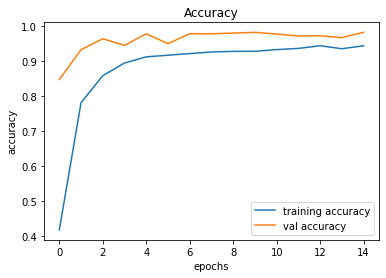

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


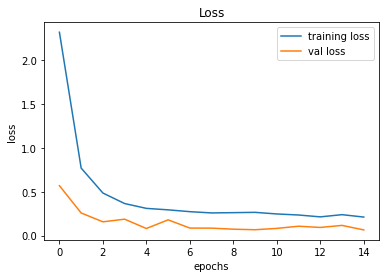

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()